In [93]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

# Chargement des données

In [94]:
#path = '/home/dj/Téléchargements/'

In [95]:
train16 = pd.read_csv('datasetzillow/train_2016_v2.csv', sep=',', header='infer', parse_dates=["transactiondate"]) 

In [96]:
X16 = pd.read_csv('datasetzillow//properties_2016.csv', sep=',', header='infer') 

C:\Users\Fitec\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
train16.head(2)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01


In [98]:
X16.head(2)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN


In [99]:
#data = {'calculatedfinishedsquarefeet': X16['calculatedfinishedsquarefeet'].values}
#X16 = pd.DataFrame(data=data,index=X16['calculatedfinishedsquarefeet'].values)
#X16=X16.dropna()
#X16['calculatedfinishedsquarefeet']
#X16.isnull()

# Exploration des données

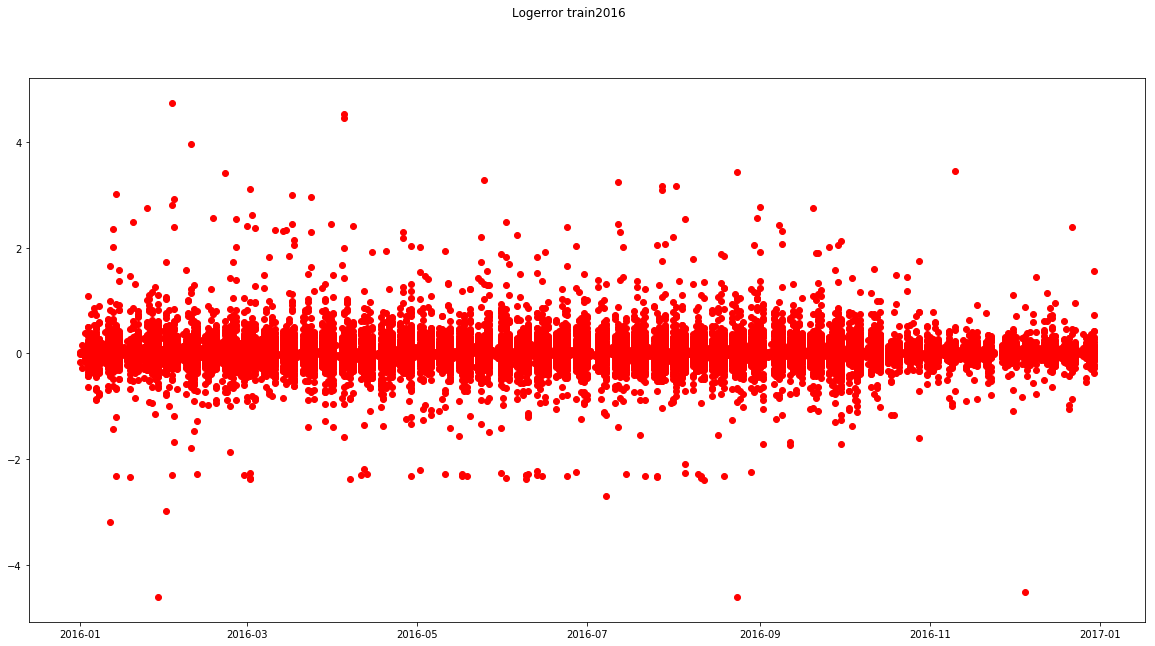

In [100]:
plt.figure(figsize=(20,10))
plt.plot(train16.transactiondate, train16.logerror, 'ro')
plt.suptitle('Logerror train2016')
plt.show()

Le logerror sur les biens vendus en 2016 se situ entre -4.65 et 5.26 avec une moyenne de 0.0167, cependant le nuage de points ci-dessus nous indique la présence d'ouliers et on remarque donc que le logerror se situ réellement entre environ -3 et +3 (nous allons affiner l'analyse par la suite)

Nous remarquons aussi que le logerror est faible à nul sur un intervale relativement régulier, s'agit-il des jours de weekend où les transactions immoblières ne sont pas enregistrées ? vérifions cela plus tard. 

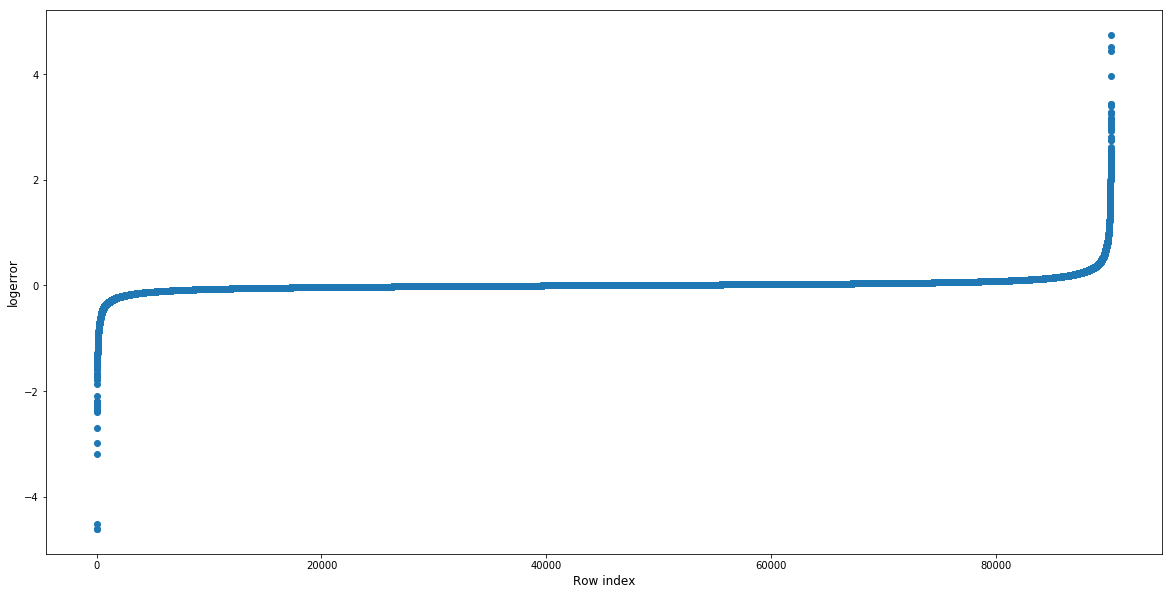

In [101]:
plt.figure(figsize=(20,10))
plt.scatter(range(train16.shape[0]), np.sort(train16.logerror.values))
plt.xlabel('Row index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

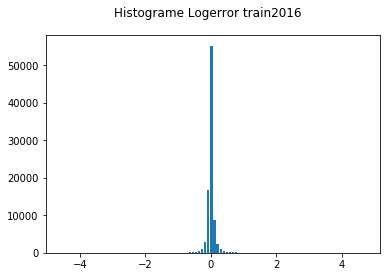

In [102]:
hist, bins = np.histogram(train16.logerror.values, bins=100)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.suptitle('Histograme Logerror train2016')
plt.show()

On remarque une distribution de forme gaussienne du logerror avec une médiane autour du 0 et un écart type faible.

> Remarque 1 : 
>> L'alogithme de Zillow prédit assez bien les valeures immoblières avec un taux d'erreur qui gravite autour de 0, avec une répartition équilibrée des valeures surestimées et des valeurs sous-estimées 

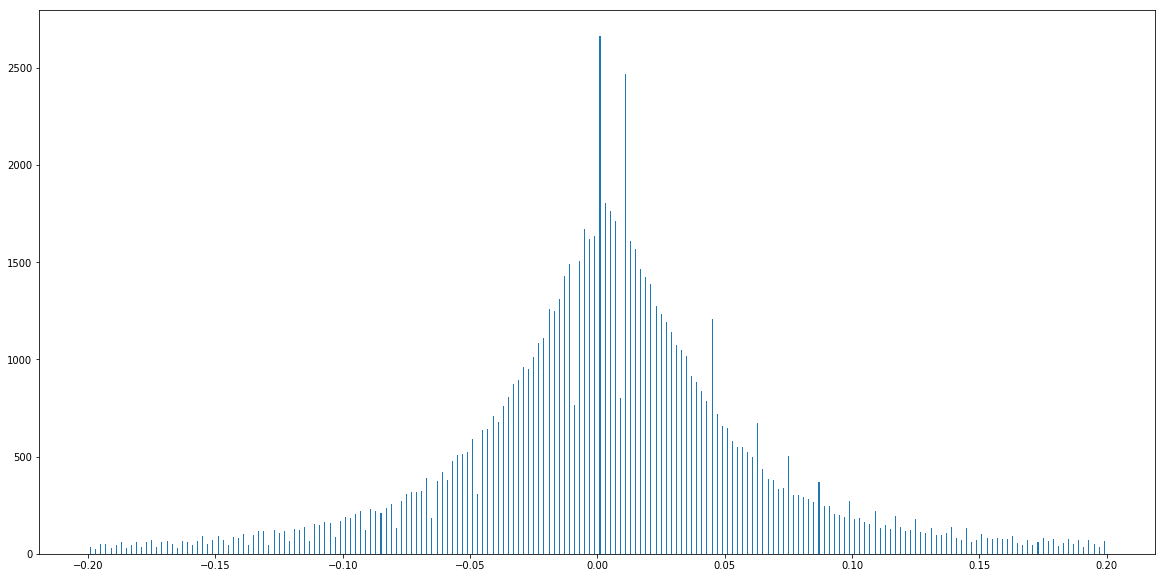

In [103]:
rangeMin,rangeMax = -0.2, 0.2
hist, bins = np.histogram(train16.logerror.values, bins=200, range=(rangeMin,rangeMax))
width = 0.2 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(20,10))
plt.bar(center, hist, align='center', width=width)
plt.show()

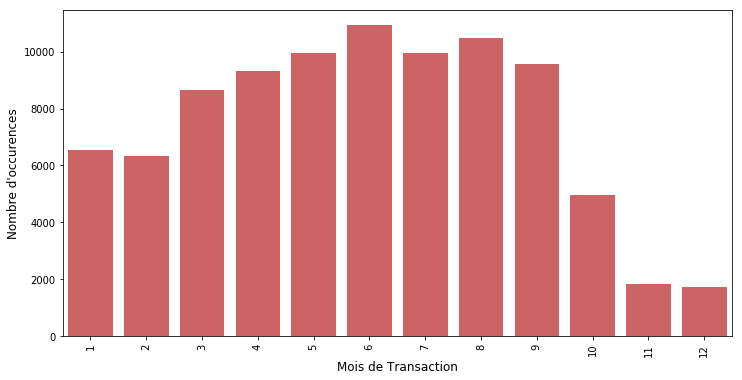

In [196]:
train16['transaction_month'] = train16['transactiondate'].dt.month

cnt_srs = train16['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Mois de Transaction', fontsize=12)
plt.ylabel("Nombre d'occurences", fontsize=12)
plt.show()

# Préparation / Nettoyage des données 

A présent nous allons fusionner les 2 DF train et properties

In [105]:
X16 = pd.merge(train16, X16, on='parcelid', suffixes=('', ''))

In [106]:
X16.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [107]:
X16.columns

Index(['parcelid', 'logerror', 'transactiondate', 'transaction_month',
       'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructionty

In [108]:
X16.describe()

,parcelid,logerror,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.027500e+04,90275.000000,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,...,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04
mean,1.298466e+07,0.011457,5.849848,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,...,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13
std,2.504510e+06,0.161079,2.812690,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,...,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11
min,1.071174e+07,-4.605000,1.000000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,...,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13
25%,1.155950e+07,-0.025300,4.000000,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,...,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13
50%,1.254734e+07,0.006000,6.000000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,...,159.000000,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13
75%,1.422755e+07,0.039200,8.000000,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,...,361.000000,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13
max,1.629608e+08,4.737000,12.000000,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,...,1366.000000,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13


Nous remarquons la présence de valeurs manquantes dans le DF, procédons à une analyse des valeurs manquantes : 

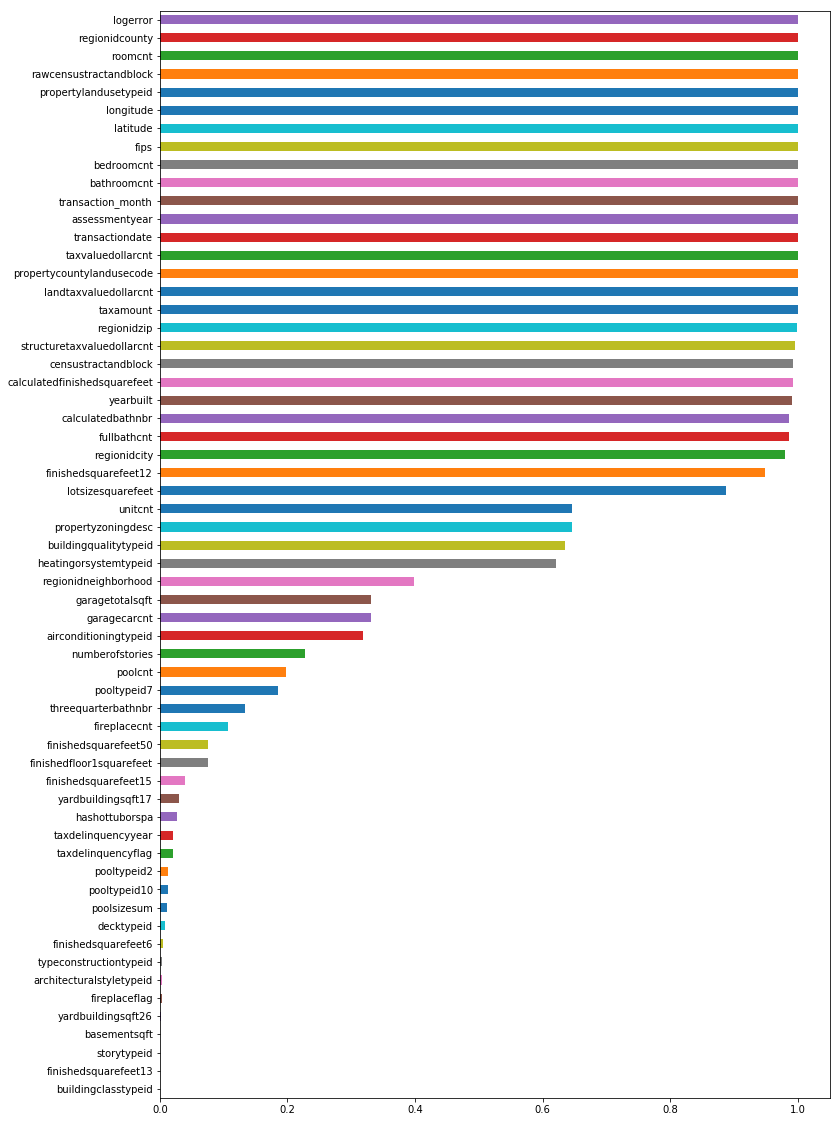

In [109]:
plt.figure(figsize=(12,20))
X16.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = True).plot(kind = 'barh')

On remarque du diagram de bars horizontal que pour presque la moitié des variables plus de 50% des données sont manquantes, 

Procédons donc au comptage des données manquantes :

In [110]:
# Calcul du nombre de données manquantes par colonne
X16_missing = X16.isnull().sum(axis=0).reset_index()
X16_missing.columns = ['column_name', 'missing_count']
X16_missing = X16_missing.sort_values(by='missing_count')

# Calcul du pourcentage des données manquantes
X16_missing['missing_rate'] = X16_missing['missing_count']/ X16.parcelid.count()
X16_missing = X16_missing.sort_values(by='missing_rate')
X16_missing.head

<bound method NDFrame.head of                      column_name  missing_count  missing_rate
0                       parcelid              0      0.000000
28                     longitude              0      0.000000
36         propertylandusetypeid              0      0.000000
38        rawcensustractandblock              0      0.000000
40                regionidcounty              0      0.000000
43                       roomcnt              0      0.000000
27                      latitude              0      0.000000
8                     bedroomcnt              0      0.000000
20                          fips              0      0.000000
55                assessmentyear              0      0.000000
3              transaction_month              0      0.000000
2                transactiondate              0      0.000000
1                       logerror              0      0.000000
7                    bathroomcnt              0      0.000000
54             taxvaluedollarcnt        

In [111]:
missing_pct = 0.8
X16.drop(X16_missing[(X16_missing.missing_rate>=missing_pct)].column_name.values.tolist(),
                    axis=1,inplace=True)

In [112]:
X16.to_csv('X16.csv')

In [113]:
pd.options.display.max_rows = 65
dtype_df = X16.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,bathroomcnt,float64
6,bedroomcnt,float64
7,buildingqualitytypeid,float64
8,calculatedbathnbr,float64
9,calculatedfinishedsquarefeet,float64


In [117]:
X16['calculatedfinishedsquarefeet'] = X16['calculatedfinishedsquarefeet'].fillna(0)

In [185]:
X16['calculatedfinishedsquarefeet'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: calculatedfinishedsquarefeet, dtype: bool

In [162]:
X = X16.calculatedfinishedsquarefeet.values
y = X16.iloc[:, 1].values

In [195]:
#View features
X = X[:, np.newaxis]
X.reshape(-1,1)
X.shape

(90275, 1, 1, 1, 1, 1, 1, 1)

In [171]:
X

array([[1684.],
       [2263.],
       [2217.],
       ...,
       [2617.],
       [1034.],
       [1524.]])

In [174]:
X.shape

(90275, 1)

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [186]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=25,max_depth=30)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)    

In [187]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0764124131643938
Mean Squared Error: 0.029171554092183038
Root Mean Squared Error: 0.17079682108336514


In [188]:
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)